In [1]:
%load_ext autoreload
%autoreload 2

# 線形作用素

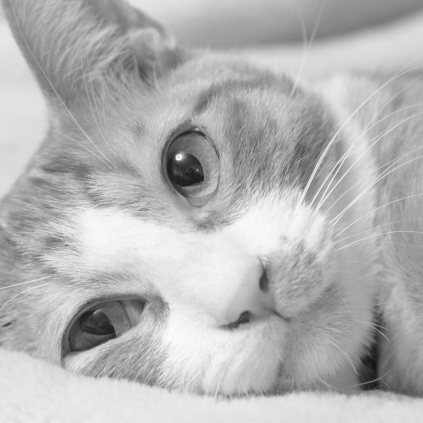

In [2]:
from PIL import Image 
from IPython.display import display
import numpy as np

cat_image = Image.open("resources/cat_gray.png")
display(cat_image)

# アフィン変換

In [3]:
cat_data = np.asarray(cat_image)
cat_data.shape

(423, 423)

## 転置

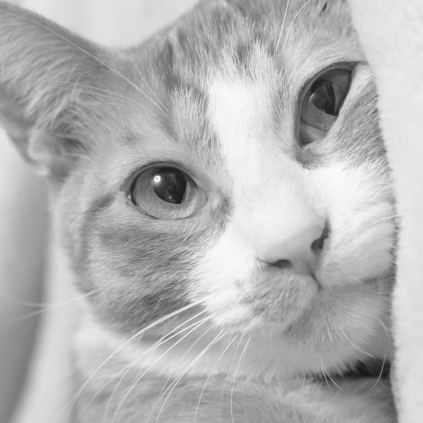

In [4]:
T = np.transpose
Image.fromarray(T(cat_data))

In [5]:
np.array_equal(T(T(cat_data)), cat_data)

True

# 相関行列

In [6]:
np.random.seed(1)
A = np.random.normal(loc=0.0, scale=0.5, size=90).reshape(3, 30)
T = np.corrcoef
C = T(A)

print("A.shape:", A.shape)
print("C:", C)

A.shape: (3, 30)
C: [[ 1.         -0.18039125  0.09368159]
 [-0.18039125  1.          0.31840999]
 [ 0.09368159  0.31840999  1.        ]]


# フーリエ変換

exp(-x**2)

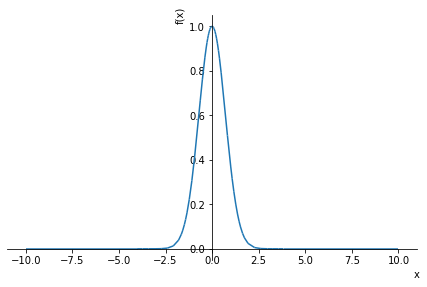

In [7]:
import sympy as sym

x = sym.symbols('x', real=True)
f = sym.exp(-x**2)
display(f)
sym.plot(f)

sqrt(pi)*exp(-k**2/4)

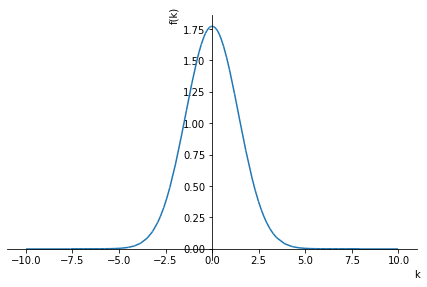

In [8]:
from npmath.compute import fourier_transform

# kはξに相当する
x, k = sym.symbols('x, k', real=True)
F = lambda f: fourier_transform(f, x, k)
g = F(f)
display(g)
sym.plot(g)

exp(-x**2)

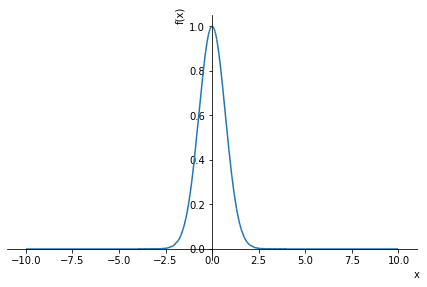

In [9]:
from npmath.compute import inverse_fourier_transform

F_inv = lambda F: inverse_fourier_transform(F, k, x)
g_inv = F_inv(F(f))
display(g_inv)
sym.plot(g_inv)

## 正方行列の作用素ノルム



In [10]:
np.random.seed(1)
T = np.random.randint(10, size=(4, 4))
T_cnj = np.conjugate(T.T)
print("T^*T:", T_cnj*T)

λ, _ = np.linalg.eig(T_cnj*T)
T_norm = np.sqrt(np.max(λ))

print("||T||:", T_norm)

T^*T: [[25  0 54 25]
 [ 0  0  9 14]
 [54  9  4 16]
 [25 14 16  4]]
||T||: 9.06342509727327


# ラグランジュの未定乗数法を用いた共分散行列の極値計算

In [11]:
import sympy as sym
import numpy as np

np.random.seed(1)
T = np.random.randint(10, size=(3, 3))
T_cnj = np.conjugate(T.T)

A = T_cnj*T

# Aの標準化
U = (A - np.mean(A, axis=0)) / np.std(A, axis=0)

print("U.mean", U.mean())
print("U.var", U.var())

# 共分散行列
S = np.dot(U.T, U) / float(U.shape[0])
print("S:", S)

x, y, z, l = sym.symbols('x y z λ')
f = x**2 + y**2 + z**2 + (2 * S[0][1] * x * y) + (2 * S[0][2] * x * z) + (2 * S[1][2] * y * z)
g = x**2 + y **2 + z**2 - 1
L = f - l * g

dx = L.diff(x)
dy = L.diff(y)
dz = L.diff(z)
dl = L.diff(l)*-1

result = sym.solve([dx, dy, dz, dl])
print("extream values:", [float(r[l].args[0]) for r in result])

U.mean -4.9343245538895844e-17
U.var 1.0
S: [[ 1.          0.01862097 -0.96576687]
 [ 0.01862097  1.         -0.2773501 ]
 [-0.96576687 -0.2773501   1.        ]]
extream values: [8.483119479783026e-16, 0.9901221112543003, 0.9901221112543003, 8.483119479783026e-16, 2.0098778887456987, 2.0098778887456987]


## 共分散行列の（二次形式の）最大値が最大固有値と一致することの確認

In [12]:
max_λ_1 = np.max([float(r[l].args[0]) for r in result])
λ, _ = np.linalg.eig(S)
max_λ_2 = np.max(λ)

print("max_λ_1:", max_λ_1)
print("max_λ_2:", max_λ_2)
print("max_λ_1 = max_λ_2:", np.isclose(max_λ_1, max_λ_2)) #誤差を考慮

max_λ_1: 2.0098778887456987
max_λ_2: 2.0098778887457
max_λ_1 = max_λ_2: True


# 有限次元におけるリースの表現定理の（気持ちの）再現

In [13]:
L = lambda x: x[0] + 2*x[1] + 3*x[2]
y = np.array([6, 0, -2])
print("L(y):", L(y))

x_0 = np.array([1, 7, 3])
print("<y, x_0>:", np.dot(y, x_0))

x = y + x_0
print("x:", x)
print("L(x - L(x)/L(x_0)x_0):", L(x - L(x)/L(x_0)*x_0))
z = L(x_0)/np.dot(x_0, x_0) * x_0

print("z:", z)
print("L(x):", L(x))
print("<x, z>:", np.dot(x, z))
print("L(x) = <x, z>:", np.isclose(L(x), np.dot(x, z))) # 誤差を考慮

L_norm = np.sqrt(L(z))
z_norm = np.linalg.norm(z)

print("‖L‖:", L_norm)
print("‖z‖:", z_norm)
print("‖L‖ = ‖z‖:", L_norm == z_norm)

L(y): 0
<y, x_0>: 0
x: [7 7 1]
L(x - L(x)/L(x_0)x_0): 0.0
z: [0.40677966 2.84745763 1.22033898]
L(x): 24
<x, z>: 24.000000000000004
L(x) = <x, z>: True
‖L‖: 3.124533863539773
‖z‖: 3.124533863539773
‖L‖ = ‖z‖: True
